In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import PIL
import random
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D, Activation
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

from IPython.display import SVG, Image

Exploring the dataset

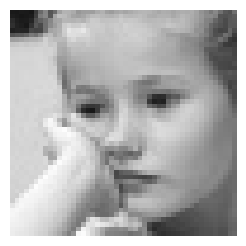

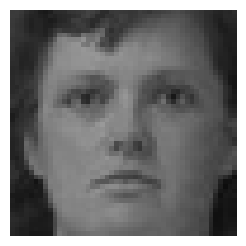

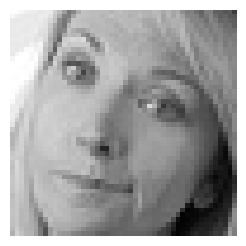

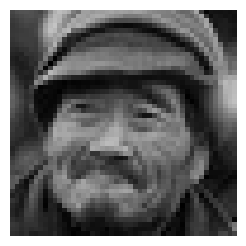

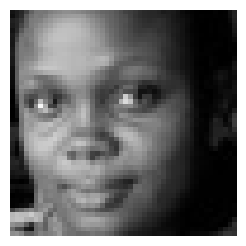

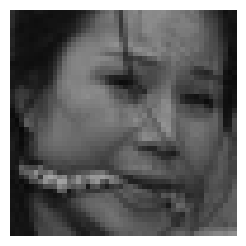

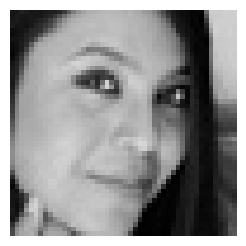

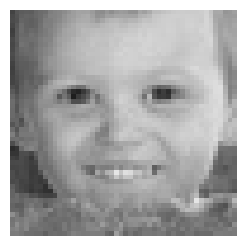

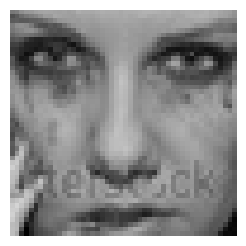

In [2]:
#to match all the files in the train directory and the subdirectory
images = glob("train/**/**")

#to randomly picks images from the train directory
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(10,10))
    plt.subplot(331+i)   # indicates 3*3 grid and iterates from 0 to 8
    plt.imshow(cv2.imread(image))
    plt.axis('off')
    

Preparing data for training

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   batch_size = batch_size,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical',
                                                   shuffle = True)

datagen_test = ImageDataGenerator()
test_generator = datagen_test.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   batch_size = batch_size,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical',
                                                   shuffle = True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Defining the model

In [4]:
def convolution( input_tensor, filters,kernel_size):
    x = Conv2D(filters= filters,kernel_size = kernel_size,padding = 'same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x


In [5]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(shape =input_shape)
    conv_1 = convolution(inputs,32,(3,3))
    conv_2 = convolution(conv_1,64,(5,5))
    conv_3 = convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation = 'softmax')(dense_1)
    model = Model(inputs=inputs, outputs=output)

    model.compile(loss = ['categorical_crossentropy'],
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    
    return model

In [7]:
input_shape = (48,48,1)
model = model_fer(input_shape)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

Training the model

In [9]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = test_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


C:\Users\Pooja Dhanush\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.3136 - loss: 1.8343
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 121s 260ms/step - accuracy: 0.3137 - loss: 1.8340 - val_accuracy: 0.4194 - val_loss: 1.5289
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:46 238ms/step - accuracy: 0.4844 - loss: 1.5701
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.4844 - loss: 1.5701 - val_accuracy: 0.3000 - val_loss: 2.4538
Epoch 3/15


C:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.4541 - loss: 1.4322
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 111s 246ms/step - accuracy: 0.4542 - loss: 1.4321 - val_accuracy: 0.4355 - val_loss: 1.5212
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:45 236ms/step - accuracy: 0.6094 - loss: 1.1324
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.6094 - loss: 1.1324 - val_accuracy: 0.6000 - val_loss: 1.0432
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5179 - loss: 1.2756
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 117s 261ms/step - accuracy: 0.5179 - loss: 1.2756 - val_accuracy: 0.5082 - val_loss: 1.2855
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:49 245ms/step - accuracy: 0.5625 - loss: 1.2354
Epoch 6: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.5625 - loss: 1.2354 - val_accuracy: 0

Model Evaluation

In [10]:
model.evaluate(test_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.5803 - loss: 1.1097


[1.09963858127594, 0.5859571099281311]

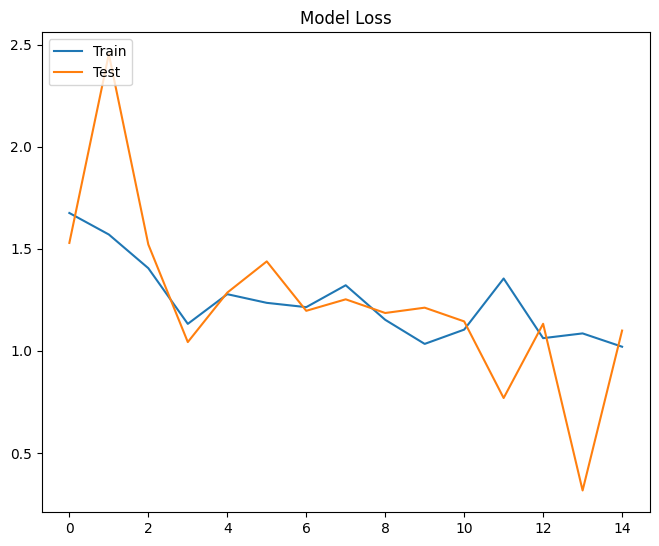

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Test'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

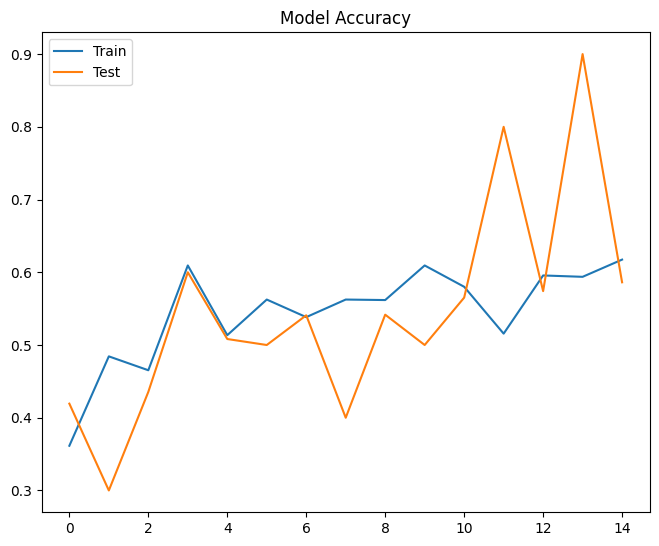

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Test'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

Saving the model to json

In [13]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)